In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set()

In [2]:
sp500 = pd.read_csv("dataset/sp500.csv",index_col='Date',parse_dates=True)
print(sp500.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1768 entries, 1871-01-01 to 2018-04-01
Data columns (total 9 columns):
SP500                   1768 non-null float64
Dividend                1767 non-null float64
Earnings                1764 non-null float64
Consumer Price Index    1768 non-null float64
Long Interest Rate      1768 non-null float64
Real Price              1768 non-null float64
Real Dividend           1767 non-null float64
Real Earnings           1764 non-null float64
PE10                    1648 non-null float64
dtypes: float64(9)
memory usage: 138.1 KB
None


In [3]:
sp500['return'] = sp500['SP500'].pct_change()
ret_arr = sp500['return'].values
# remove nan
ret_arr = ret_arr[~np.isnan(ret_arr)]

mu = np.mean(ret_arr)
sigma = np.std(ret_arr)

print(ret_arr)
print("Average monthly return: {}".format(mu))
print("Standard deviation of monthly return: {}".format(sigma))

[ 0.01351351  0.02444444  0.02819957 ... -0.03033909 -0.0008835
 -0.02241404]
Average monthly return: 0.004442307774714635
Standard deviation of monthly return: 0.0405779529005325


In [4]:
num_bins = 300

x = np.linspace(np.min(ret_arr), np.max(ret_arr), num_bins)
normal_dist = stats.norm.pdf(x, mu, sigma)
t_dist = stats.t.pdf(x, 1, mu, sigma)

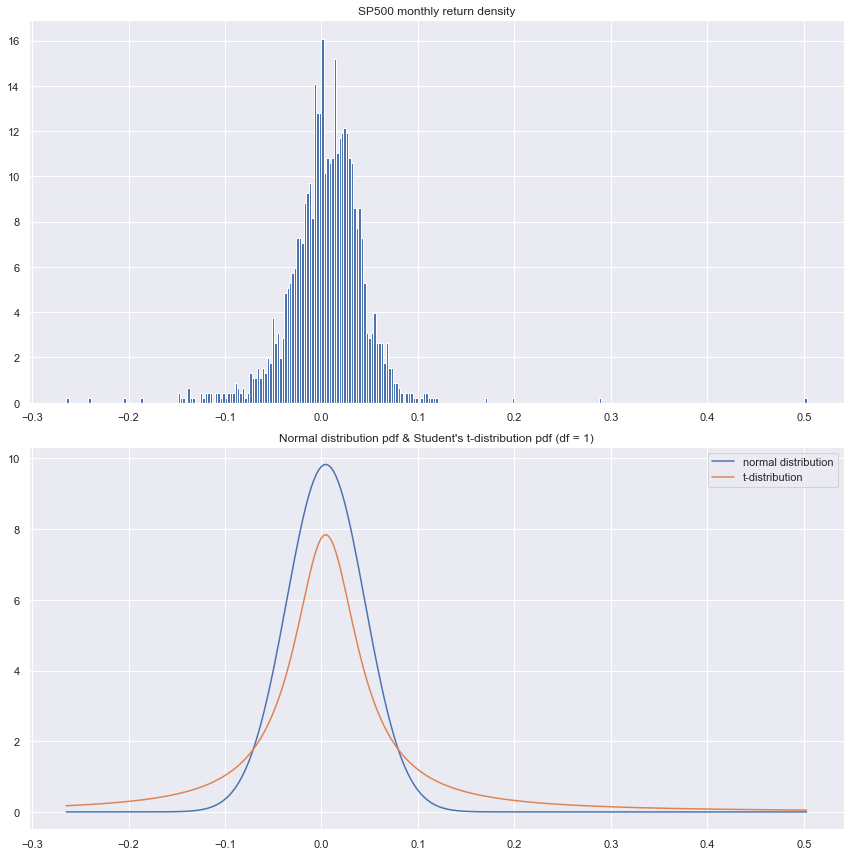

In [5]:
fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(12,12))

ax[0].hist(ret_arr, bins=x, density=True)
ax[0].set_title('SP500 monthly return density', size='large')

ax[1].plot(x, normal_dist, label='normal distribution')
ax[1].plot(x, t_dist, label='t-distribution')
ax[1].set_title("Normal distribution pdf & Student's t-distribution pdf (df = 1)",size='large')
ax[1].legend()

plt.tight_layout()

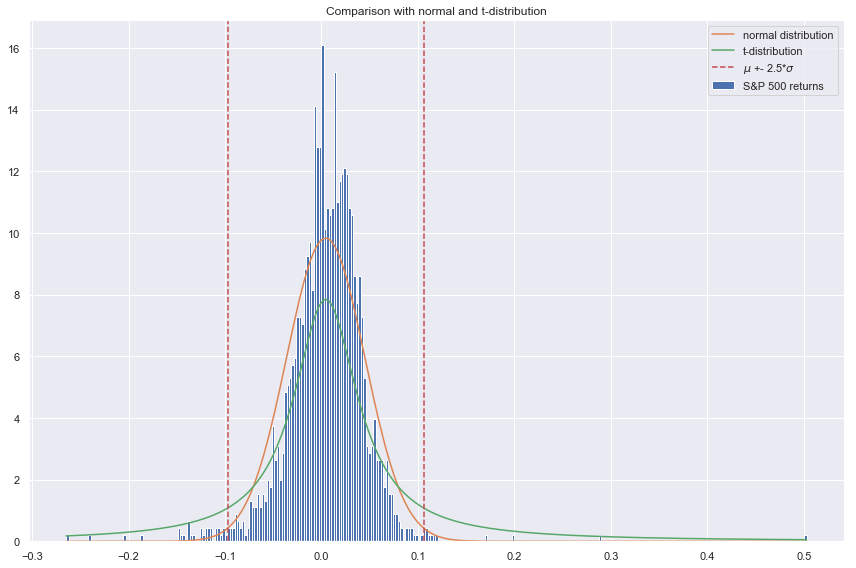

In [6]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

ax.hist(ret_arr, bins=x, density=True, label='S&P 500 returns')
ax.plot(x, normal_dist, label='normal distribution')
ax.plot(x, t_dist, label='t-distribution')

ax.set_title('Comparison with normal and t-distribution', size='large')
ax.axvline(x=mu+2.5*sigma,color='r', linestyle='--', label='$\mu$ +- 2.5*$\sigma$')
ax.axvline(x=mu-2.5*sigma,color='r', linestyle='--')
ax.legend()

plt.tight_layout()

In [18]:
tail_count = len(ret_arr[ret_arr > (mu + 2.5*sigma)]) + len(ret_arr[ret_arr < (mu - 2.5*sigma)])
print("Count of return at tail: ",tail_count)
print("Percent of tail return: {} %".format(tail_count/len(ret_arr)*100))

Count of return at tail:  43
Percent of tail return: 2.43350311262026 %
